<a href="https://colab.research.google.com/github/gyeongdong13/Competition/blob/main/%EC%9C%A0%ED%86%B5%EC%82%AC_%EB%82%B4_%EC%A0%9C%ED%9C%B4%EC%82%AC_%EC%98%88%EC%B8%A1%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import ReduceLROnPlateau
import math
import matplotlib.pyplot as plt

In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/LPOINT 2번 data.csv', encoding='utf-8')
df2

col_name = ['고객번호', '영수증 번호', '채널 구분', '제휴사', '점포 코드', '상품 코드', '구매 일자', '구매 시간', '구매 금액', '구매 수량']
df2.columns = col_name
df2

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,고객번호,영수증 번호,채널 구분,제휴사,점포 코드,상품 코드,구매 일자,구매 시간,구매 금액,구매 수량
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1


In [ ]:
df2["구매 일자"] = df2["구매 일자"].astype(str)
df2

,고객번호,영수증 번호,채널 구분,제휴사,점포 코드,상품 코드,구매 일자,구매 시간,구매 금액,구매 수량
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1


In [ ]:
# 구매일자를 날짜형 데이터로 변환
from datetime import datetime
df2["구매 일자"] = pd.to_datetime(df2["구매 일자"])
df2["연월"] = df2["구매 일자"].dt.strftime("%Y-%m")
df2

,고객번호,영수증 번호,채널 구분,제휴사,점포 코드,상품 코드,구매 일자,구매 시간,구매 금액,구매 수량,연월
0,M430112881,A01000001113,1,A01,A010039,PD0290,2021-01-01,10,15000.0,1,2021-01
1,M646853852,A01000002265,1,A01,A010025,PD1369,2021-01-01,10,79700.0,1,2021-01
2,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,2021-01
3,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,2021-01
4,M430112881,A01000004946,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,2021-01
...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1,2021-12
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1,2021-12
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1,2021-12
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1,2021-12


In [ ]:
year_month = list(df2["연월"].unique())
pred_data = pd.DataFrame()

year_month

['2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12']

In [ ]:
grouped = df2.groupby(['고객번호','연월'], as_index = False)["구매 일자"].count()
grouped

,고객번호,연월,구매 일자
0,M000034966,2021-01,6
1,M000034966,2021-03,9
2,M000034966,2021-06,1
3,M000034966,2021-08,1
4,M000034966,2021-09,25
...,...,...,...
217331,M999962961,2021-08,26
217332,M999962961,2021-09,16
217333,M999962961,2021-10,23
217334,M999962961,2021-11,15


In [ ]:
grouped.rename(columns = {"구매 일자" : "구매 건수"}, inplace = True)

grouped

,고객번호,연월,구매 건수
0,M000034966,2021-01,6
1,M000034966,2021-03,9
2,M000034966,2021-06,1
3,M000034966,2021-08,1
4,M000034966,2021-09,25
...,...,...,...
217331,M999962961,2021-08,26
217332,M999962961,2021-09,16
217333,M999962961,2021-10,23
217334,M999962961,2021-11,15


In [ ]:
pdf1 = pd.pivot_table(grouped,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = '연월',    # 열 위치에 들어갈 열
                     values = '구매 건수')
pdf1

연월,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
고객번호,,,,,,,,,,,,
M000034966,6.0,NaN,9.0,NaN,NaN,1.0,NaN,1.0,25.0,NaN,NaN,9.0
M000136117,27.0,11.0,3.0,NaN,12.0,10.0,11.0,17.0,NaN,4.0,NaN,14.0
M000201112,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN,NaN,3.0,NaN
M000225114,NaN,NaN,25.0,48.0,3.0,4.0,5.0,12.0,10.0,24.0,19.0,9.0
M000261625,3.0,5.0,3.0,5.0,4.0,3.0,17.0,4.0,11.0,8.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
M999599111,1.0,1.0,NaN,17.0,NaN,11.0,NaN,NaN,NaN,2.0,2.0,NaN
M999673157,NaN,8.0,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,11.0
M999770689,9.0,68.0,19.0,7.0,20.0,21.0,40.0,40.0,52.0,21.0,6.0,12.0


In [ ]:
pdf1 = pdf1.fillna(0)
pdf1

연월,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
고객번호,,,,,,,,,,,,
M000034966,6.0,0.0,9.0,0.0,0.0,1.0,0.0,1.0,25.0,0.0,0.0,9.0
M000136117,27.0,11.0,3.0,0.0,12.0,10.0,11.0,17.0,0.0,4.0,0.0,14.0
M000201112,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,3.0,0.0
M000225114,0.0,0.0,25.0,48.0,3.0,4.0,5.0,12.0,10.0,24.0,19.0,9.0
M000261625,3.0,5.0,3.0,5.0,4.0,3.0,17.0,4.0,11.0,8.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
M999599111,1.0,1.0,0.0,17.0,0.0,11.0,0.0,0.0,0.0,2.0,2.0,0.0
M999673157,0.0,8.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0
M999770689,9.0,68.0,19.0,7.0,20.0,21.0,40.0,40.0,52.0,21.0,6.0,12.0


In [ ]:
pdf1 = pdf1.reset_index()
pdf1

연월,고객번호,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,M000034966,6.0,0.0,9.0,0.0,0.0,1.0,0.0,1.0,25.0,0.0,0.0,9.0
1,M000136117,27.0,11.0,3.0,0.0,12.0,10.0,11.0,17.0,0.0,4.0,0.0,14.0
2,M000201112,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,3.0,0.0
3,M000225114,0.0,0.0,25.0,48.0,3.0,4.0,5.0,12.0,10.0,24.0,19.0,9.0
4,M000261625,3.0,5.0,3.0,5.0,4.0,3.0,17.0,4.0,11.0,8.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,1.0,1.0,0.0,17.0,0.0,11.0,0.0,0.0,0.0,2.0,2.0,0.0
26913,M999673157,0.0,8.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0
26914,M999770689,9.0,68.0,19.0,7.0,20.0,21.0,40.0,40.0,52.0,21.0,6.0,12.0
26915,M999849895,0.0,4.0,7.0,5.0,4.0,1.0,1.0,23.0,20.0,3.0,0.0,4.0


In [ ]:
data = pdf1.loc[:,['2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11']]
target = pdf1.loc[:,['2021-12']]

from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
data_scaled = data_scaler.fit_transform(data)

target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(target)

In [ ]:
#정규화 결과
data = pd.DataFrame(data_scaled,columns=['2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11'])
data = data.fillna(0)
data

,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11
0,0.009917,0.000000,0.010870,0.000000,0.000000,0.000638,0.000000,0.000785,0.007469,0.000000,0.000000
1,0.044628,0.012128,0.003623,0.000000,0.009909,0.006378,0.007560,0.013344,0.000000,0.003478,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006186,0.007064,0.000000,0.000000,0.003576
3,0.000000,0.000000,0.030193,0.055684,0.002477,0.002551,0.003436,0.009419,0.002988,0.020870,0.022646
4,0.004959,0.005513,0.003623,0.005800,0.003303,0.001913,0.011684,0.003140,0.003287,0.006957,0.002384
...,...,...,...,...,...,...,...,...,...,...,...
26912,0.001653,0.001103,0.000000,0.019722,0.000000,0.007015,0.000000,0.000000,0.000000,0.001739,0.002384
26913,0.000000,0.008820,0.002415,0.000000,0.000000,0.000000,0.002062,0.000000,0.000000,0.000000,0.000000
26914,0.014876,0.074972,0.022947,0.008121,0.016515,0.013393,0.027491,0.031397,0.015536,0.018261,0.007151
26915,0.000000,0.004410,0.008454,0.005800,0.003303,0.000638,0.000687,0.018053,0.005976,0.002609,0.000000


In [ ]:
#정규화 결과
target = pd.DataFrame(target_scaled,columns=['2021-12'])
target = target.fillna(0)
target

,2021-12
0,0.010333
1,0.016073
2,0.000000
3,0.010333
4,0.002296
...,...
26912,0.000000
26913,0.012629
26914,0.013777
26915,0.004592


In [ ]:
np.shape(data)

(26917, 11)

In [ ]:
data = np.array(data)
data = np.reshape(data, (data.shape[0], data.shape[1],1))
np.shape(data)

(26917, 11, 1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle = False)

In [ ]:
x_train_shape = np.shape(x_train)
y_train_shape = np.shape(y_train)
x_test_shape = np.shape(x_test)
y_test_shape = np.shape(y_test)

print('x_train:',x_train_shape, 'y_train:',y_train_shape)
print('x_test:',x_test_shape, 'y_test:',y_test_shape)

x_train: (21533, 11, 1) y_train: (21533, 1)
x_test: (5384, 11, 1) y_test: (5384, 1)


In [ ]:
#모델 생성
model  = Sequential()
model.add(LSTM(48, activation='tanh',input_shape=(11,1)))
model.add(Dense(64,kernel_initializer = 'uniform',activation='relu'))
model.add(Dense(1,kernel_initializer = 'uniform',activation='relu'))
model.compile(loss='mse', optimizer='adam')
model.summary()

history = model.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_test, y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 48)                9600      
                                                                 
 dense_10 (Dense)            (None, 64)                3136      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
85/85 [==============================] - 24s 109ms/step - loss: 4.2048e-04 - val_loss: 2.9924e-04
Epoch 2/10
85/85 [==============================] - 7s 80ms/step - loss: 2.4140e-04 - val_loss: 2.0734e-04
Epoch 3/10
85/85 [==============================] - 7s 83ms/step - loss: 2.0536e-04 - val_loss: 1.

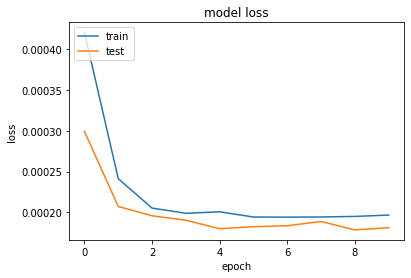

In [ ]:
#학습 진행률
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#예측
predictions = model.predict(x_test)

#정규화한 것을 실제값으로 변환
val = target_scaler.inverse_transform(y_test)
predic = target_scaler.inverse_transform(predictions)

In [ ]:
#예측값과 실제 값 오차
rmse = np.sqrt(np.mean(predic - y_test)**2)
rmse

2021-12    10.852996
dtype: float64

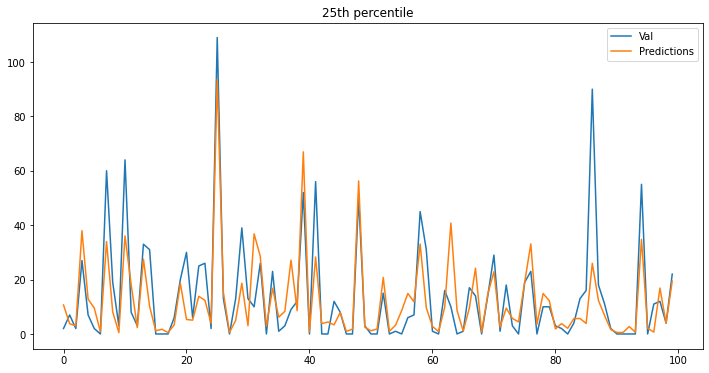

In [ ]:
plt.figure(figsize=(12,6))
plt.title('25th percentile')
plt.plot(val[-100:])
plt.plot(predic[-100:])
plt.legend(['Val', 'Predictions'])

In [ ]:
data = pdf1.loc[:,['2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12']]

from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
data_scaled = data_scaler.fit_transform(data)

In [ ]:
data = pd.DataFrame(data_scaled,columns=['2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12'])
data = data.fillna(0)
data

,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,0.000000,0.010870,0.000000,0.000000,0.000638,0.000000,0.000785,0.007469,0.000000,0.000000,0.010333
1,0.012128,0.003623,0.000000,0.009909,0.006378,0.007560,0.013344,0.000000,0.003478,0.000000,0.016073
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.006186,0.007064,0.000000,0.000000,0.003576,0.000000
3,0.000000,0.030193,0.055684,0.002477,0.002551,0.003436,0.009419,0.002988,0.020870,0.022646,0.010333
4,0.005513,0.003623,0.005800,0.003303,0.001913,0.011684,0.003140,0.003287,0.006957,0.002384,0.002296
...,...,...,...,...,...,...,...,...,...,...,...
26912,0.001103,0.000000,0.019722,0.000000,0.007015,0.000000,0.000000,0.000000,0.001739,0.002384,0.000000
26913,0.008820,0.002415,0.000000,0.000000,0.000000,0.002062,0.000000,0.000000,0.000000,0.000000,0.012629
26914,0.074972,0.022947,0.008121,0.016515,0.013393,0.027491,0.031397,0.015536,0.018261,0.007151,0.013777
26915,0.004410,0.008454,0.005800,0.003303,0.000638,0.000687,0.018053,0.005976,0.002609,0.000000,0.004592


In [ ]:
predictions = model.predict(data)
predictions

array([[0.00484439],
       [0.00866591],
       [0.00220215],
       ...,
       [0.01815356],
       [0.00467352],
       [0.02460379]], dtype=float32)

In [ ]:
predic = target_scaler.inverse_transform(predictions)
predic

array([[ 4.2194653],
       [ 7.548007 ],
       [ 1.9180702],
       ...,
       [15.8117485],
       [ 4.0706387],
       [21.429903 ]], dtype=float32)

In [ ]:
tmp_pred = pd.DataFrame(predic)
col_name = ['구매건수']
tmp_pred.columns = col_name
tmp_pred

,구매건수
0,4.219465
1,7.548007
2,1.918070
3,14.256324
4,3.763278
...,...
26912,1.571233
26913,4.128352
26914,15.811749
26915,4.070639


In [ ]:
tmp_pred = pd.concat([pdf1["고객번호"],tmp_pred], axis=1)
round(tmp_pred,0)

,고객번호,구매건수
0,M000034966,4.0
1,M000136117,8.0
2,M000201112,2.0
3,M000225114,14.0
4,M000261625,4.0
...,...,...
26912,M999599111,2.0
26913,M999673157,4.0
26914,M999770689,16.0
26915,M999849895,4.0


# 클러스터 추가

In [ ]:
cluster = pd.read_csv('/content/drive/MyDrive/clustering.csv')

In [ ]:
final = pd.merge(tmp_pred, cluster[["고객번호","clusters","score"]], on = "고객번호", how = "inner")
final

,고객번호,구매건수,clusters,score
0,M000034966,4.219465,0,0
1,M000034966,4.219465,0,0
2,M000034966,4.219465,0,0
3,M000034966,4.219465,0,0
4,M000034966,4.219465,0,0
...,...,...,...,...
4381738,M999962961,21.429903,0,0
4381739,M999962961,21.429903,0,0
4381740,M999962961,21.429903,0,0
4381741,M999962961,21.429903,0,0


In [ ]:
final = final.drop_duplicates()
final

,고객번호,구매건수,clusters,score
0,M000034966,4.219465,0,0
51,M000136117,7.548007,0,0
160,M000201112,1.918070,0,0
181,M000225114,14.256324,0,0
340,M000261625,3.763278,0,0
...,...,...,...,...
4380967,M999599111,1.571233,0,0
4381001,M999673157,4.128352,0,0
4381025,M999770689,15.811749,0,0
4381340,M999849895,4.070639,0,0


In [ ]:
final.groupby(['clusters'], as_index = False)["고객번호"].count()

,clusters,고객번호
0,0,25922
1,1,1
2,2,993
3,3,1


In [ ]:
final.groupby(['clusters'], as_index = False)["구매건수"].sum()

,clusters,구매건수
0,0,258520.390625
1,1,853.802307
2,2,62085.644531
3,3,794.731995


In [ ]:
final.groupby(['clusters'], as_index = False)["구매건수"].mean()

,clusters,구매건수
0,0,9.973011
1,1,853.802307
2,2,62.523308
3,3,794.731995


In [ ]:
final.groupby(['clusters',"score"], as_index = False)["고객번호"].count()

,clusters,score,고객번호
0,0,0,24767
1,0,1,1155
2,1,1,1
3,2,0,2
4,2,1,991
5,3,1,1


# 구매금액에 대한 예측

In [ ]:
grouped = df2.groupby(['고객번호','연월'], as_index = False)["구매 금액"].sum()
grouped

,고객번호,연월,구매 금액
0,M000034966,2021-01,152200.0
1,M000034966,2021-03,180060.0
2,M000034966,2021-06,65700.0
3,M000034966,2021-08,1400.0
4,M000034966,2021-09,164060.0
...,...,...,...
217331,M999962961,2021-08,178939.0
217332,M999962961,2021-09,112530.0
217333,M999962961,2021-10,1882330.0
217334,M999962961,2021-11,155803.0


In [ ]:
pdf1 = pd.pivot_table(grouped,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = '연월',    # 열 위치에 들어갈 열
                     values = '구매 금액')
pdf1

연월,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
고객번호,,,,,,,,,,,,
M000034966,152200.0,NaN,180060.0,NaN,NaN,65700.0,NaN,1400.0,164060.0,NaN,NaN,90700.0
M000136117,10660370.0,2369100.0,4001200.0,NaN,982000.0,804900.0,3254000.0,2238760.0,NaN,1570000.0,NaN,1493300.0
M000201112,NaN,NaN,NaN,NaN,NaN,NaN,33500.0,14420.0,NaN,NaN,5200.0,NaN
M000225114,NaN,NaN,213360.0,537710.0,25000.0,37110.0,79500.0,67170.0,222990.0,172240.0,482820.0,99800.0
M000261625,242000.0,199700.0,230300.0,586800.0,65400.0,284800.0,2078200.0,245800.0,654800.0,1136900.0,260000.0,68000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
M999599111,22900.0,1158000.0,NaN,210232.0,NaN,66790.0,NaN,NaN,NaN,18000.0,8100.0,NaN
M999673157,NaN,119300.0,49500.0,NaN,NaN,NaN,1789000.0,NaN,NaN,NaN,NaN,893570.0
M999770689,31270.0,259020.0,77070.0,16500.0,69500.0,53180.0,95190.0,90500.0,358620.0,58290.0,10600.0,67400.0


In [ ]:
pdf1 = pdf1.fillna(0)
pdf1

연월,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
고객번호,,,,,,,,,,,,
M000034966,152200.0,0.0,180060.0,0.0,0.0,65700.0,0.0,1400.0,164060.0,0.0,0.0,90700.0
M000136117,10660370.0,2369100.0,4001200.0,0.0,982000.0,804900.0,3254000.0,2238760.0,0.0,1570000.0,0.0,1493300.0
M000201112,0.0,0.0,0.0,0.0,0.0,0.0,33500.0,14420.0,0.0,0.0,5200.0,0.0
M000225114,0.0,0.0,213360.0,537710.0,25000.0,37110.0,79500.0,67170.0,222990.0,172240.0,482820.0,99800.0
M000261625,242000.0,199700.0,230300.0,586800.0,65400.0,284800.0,2078200.0,245800.0,654800.0,1136900.0,260000.0,68000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
M999599111,22900.0,1158000.0,0.0,210232.0,0.0,66790.0,0.0,0.0,0.0,18000.0,8100.0,0.0
M999673157,0.0,119300.0,49500.0,0.0,0.0,0.0,1789000.0,0.0,0.0,0.0,0.0,893570.0
M999770689,31270.0,259020.0,77070.0,16500.0,69500.0,53180.0,95190.0,90500.0,358620.0,58290.0,10600.0,67400.0


In [ ]:
pdf1 = pdf1.reset_index()
pdf1

연월,고객번호,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,M000034966,152200.0,0.0,180060.0,0.0,0.0,65700.0,0.0,1400.0,164060.0,0.0,0.0,90700.0
1,M000136117,10660370.0,2369100.0,4001200.0,0.0,982000.0,804900.0,3254000.0,2238760.0,0.0,1570000.0,0.0,1493300.0
2,M000201112,0.0,0.0,0.0,0.0,0.0,0.0,33500.0,14420.0,0.0,0.0,5200.0,0.0
3,M000225114,0.0,0.0,213360.0,537710.0,25000.0,37110.0,79500.0,67170.0,222990.0,172240.0,482820.0,99800.0
4,M000261625,242000.0,199700.0,230300.0,586800.0,65400.0,284800.0,2078200.0,245800.0,654800.0,1136900.0,260000.0,68000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,22900.0,1158000.0,0.0,210232.0,0.0,66790.0,0.0,0.0,0.0,18000.0,8100.0,0.0
26913,M999673157,0.0,119300.0,49500.0,0.0,0.0,0.0,1789000.0,0.0,0.0,0.0,0.0,893570.0
26914,M999770689,31270.0,259020.0,77070.0,16500.0,69500.0,53180.0,95190.0,90500.0,358620.0,58290.0,10600.0,67400.0
26915,M999849895,0.0,80950.0,358600.0,35200.0,116100.0,1500.0,32000.0,189900.0,182552.0,86000.0,0.0,20990.0


In [ ]:
data = pdf1.loc[:,['2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11']]
target = pdf1.loc[:,['2021-12']]

from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
data_scaled = data_scaler.fit_transform(data)

target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(target)

In [ ]:
#정규화 결과
data = pd.DataFrame(data_scaled,columns=['2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11'])
data = data.fillna(0)
data

,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11
0,0.001918,0.000000,0.002446,0.000000,0.000000,0.000708,0.000000,0.000010,0.001023,0.000000,0.000000
1,0.134360,0.043281,0.054348,0.000000,0.014673,0.008677,0.018613,0.015495,0.000000,0.016357,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000192,0.000100,0.000000,0.000000,0.000055
3,0.000000,0.000000,0.002898,0.004714,0.000374,0.000400,0.000455,0.000465,0.001391,0.001794,0.005074
4,0.003050,0.003648,0.003128,0.005144,0.000977,0.003070,0.011887,0.001701,0.004084,0.011845,0.002733
...,...,...,...,...,...,...,...,...,...,...,...
26912,0.000289,0.021155,0.000000,0.001843,0.000000,0.000720,0.000000,0.000000,0.000000,0.000188,0.000085
26913,0.000000,0.002179,0.000672,0.000000,0.000000,0.000000,0.010233,0.000000,0.000000,0.000000,0.000000
26914,0.000394,0.004732,0.001047,0.000145,0.001038,0.000573,0.000544,0.000626,0.002237,0.000607,0.000111
26915,0.000000,0.001479,0.004871,0.000309,0.001735,0.000016,0.000183,0.001314,0.001139,0.000896,0.000000


In [ ]:
#정규화 결과
target = pd.DataFrame(target_scaled,columns=['2021-12'])
target = target.fillna(0)
target

,2021-12
0,0.000621
1,0.010225
2,0.000000
3,0.000683
4,0.000466
...,...
26912,0.000000
26913,0.006118
26914,0.000461
26915,0.000144


In [ ]:
np.shape(data)

(26917, 11)

In [ ]:
data = np.array(data)
data = np.reshape(data, (data.shape[0], data.shape[1],1))
np.shape(data)

(26917, 11, 1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle = False)

In [ ]:
x_train_shape = np.shape(x_train)
y_train_shape = np.shape(y_train)
x_test_shape = np.shape(x_test)
y_test_shape = np.shape(y_test)

print('x_train:',x_train_shape, 'y_train:',y_train_shape)
print('x_test:',x_test_shape, 'y_test:',y_test_shape)

x_train: (21533, 11, 1) y_train: (21533, 1)
x_test: (5384, 11, 1) y_test: (5384, 1)


In [ ]:
#모델 생성
model  = Sequential()
model.add(LSTM(48, activation='tanh',input_shape=(11,1)))
model.add(Dense(64,kernel_initializer = 'uniform',activation='relu'))
model.add(Dense(1,kernel_initializer = 'uniform',activation='relu'))
model.compile(loss='mse', optimizer='adam')
model.summary()

history = model.fit(x_train, y_train, batch_size=256, epochs=20, validation_data=(x_test, y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 48)                9600      
                                                                 
 dense_8 (Dense)             (None, 64)                3136      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
85/85 [==============================] - 3s 19ms/step - loss: 1.0646e-04 - val_loss: 2.3443e-04
Epoch 2/20
85/85 [==============================] - 1s 13ms/step - loss: 8.6182e-05 - val_loss: 2.3390e-04
Epoch 3/20
85/85 [==============================] - 1s 13ms/step - loss: 8.5431e-05 - val_loss: 2.42

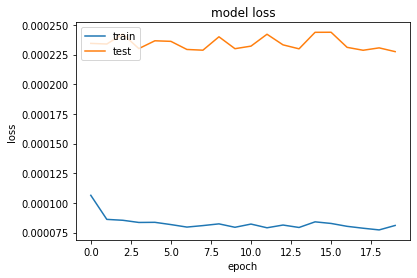

In [ ]:
#학습 진행률
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#예측
predictions = model.predict(x_test)

#정규화한 것을 실제값으로 변환
val = target_scaler.inverse_transform(y_test)
predic = target_scaler.inverse_transform(predictions)

In [ ]:
#예측값과 실제 값 오차
rmse = np.sqrt(np.mean(predic - y_test)**2)
rmse

2021-12    290742.299314
dtype: float64

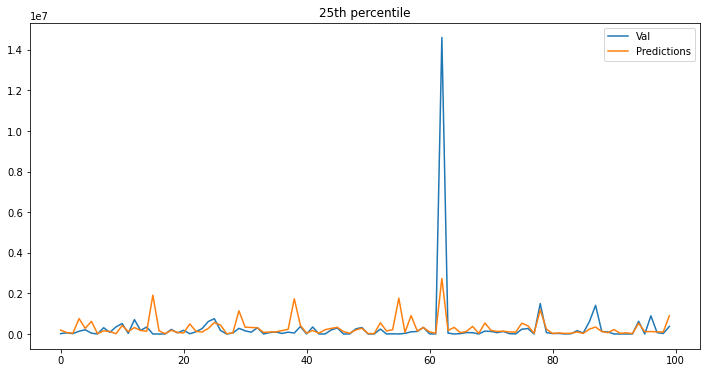

In [ ]:
plt.figure(figsize=(12,6))
plt.title('25th percentile')
plt.plot(val[-100:])
plt.plot(predic[-100:])
plt.legend(['Val', 'Predictions'])

In [ ]:
data = pdf1.loc[:,['2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12']]

from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
data_scaled = data_scaler.fit_transform(data)

In [ ]:
data = pd.DataFrame(data_scaled,columns=['2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12'])
data = data.fillna(0)
data

,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,0.000000,0.002446,0.000000,0.000000,0.000708,0.000000,0.000010,0.001023,0.000000,0.000000,0.000621
1,0.043281,0.054348,0.000000,0.014673,0.008677,0.018613,0.015495,0.000000,0.016357,0.000000,0.010225
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000192,0.000100,0.000000,0.000000,0.000055,0.000000
3,0.000000,0.002898,0.004714,0.000374,0.000400,0.000455,0.000465,0.001391,0.001794,0.005074,0.000683
4,0.003648,0.003128,0.005144,0.000977,0.003070,0.011887,0.001701,0.004084,0.011845,0.002733,0.000466
...,...,...,...,...,...,...,...,...,...,...,...
26912,0.021155,0.000000,0.001843,0.000000,0.000720,0.000000,0.000000,0.000000,0.000188,0.000085,0.000000
26913,0.002179,0.000672,0.000000,0.000000,0.000000,0.010233,0.000000,0.000000,0.000000,0.000000,0.006118
26914,0.004732,0.001047,0.000145,0.001038,0.000573,0.000544,0.000626,0.002237,0.000607,0.000111,0.000461
26915,0.001479,0.004871,0.000309,0.001735,0.000016,0.000183,0.001314,0.001139,0.000896,0.000000,0.000144


In [ ]:
predictions = model.predict(data)
predictions

array([[0.00032857],
       [0.00817152],
       [0.00010955],
       ...,
       [0.00064104],
       [0.00059419],
       [0.0048468 ]], dtype=float32)

In [ ]:
predic = target_scaler.inverse_transform(predictions)
predic = np.round(predic)
predic

array([[  47986.],
       [1193416.],
       [  15999.],
       ...,
       [  93621.],
       [  86778.],
       [ 707854.]], dtype=float32)

In [ ]:
tmp_pred = pd.DataFrame(predic)
col_name = ['구매금액']
tmp_pred.columns = col_name
tmp_pred

,구매금액
0,47986.0
1,1193416.0
2,15999.0
3,183590.0
4,452097.0
...,...
26912,95336.0
26913,200424.0
26914,93621.0
26915,86778.0


In [ ]:
tmp_pred = pd.concat([pdf1["고객번호"],tmp_pred], axis=1)
tmp_pred

,고객번호,구매금액
0,M000034966,47986.0
1,M000136117,1193416.0
2,M000201112,15999.0
3,M000225114,183590.0
4,M000261625,452097.0
...,...,...
26912,M999599111,95336.0
26913,M999673157,200424.0
26914,M999770689,93621.0
26915,M999849895,86778.0


# 클러스터 부여

In [ ]:
cluster = pd.read_csv('/content/drive/MyDrive/clustering.csv')

In [ ]:
final = pd.merge(tmp_pred, cluster[["고객번호","clusters","score"]], on = "고객번호", how = "inner")
final

,고객번호,구매금액,clusters,score
0,M000034966,47986.0,0,0
1,M000034966,47986.0,0,0
2,M000034966,47986.0,0,0
3,M000034966,47986.0,0,0
4,M000034966,47986.0,0,0
...,...,...,...,...
4381738,M999962961,707854.0,0,0
4381739,M999962961,707854.0,0,0
4381740,M999962961,707854.0,0,0
4381741,M999962961,707854.0,0,0


In [ ]:
final = final.drop_duplicates()
final

,고객번호,구매금액,clusters,score
0,M000034966,47986.0,0,0
51,M000136117,1193416.0,0,0
160,M000201112,15999.0,0,0
181,M000225114,183590.0,0,0
340,M000261625,452097.0,0,0
...,...,...,...,...
4380967,M999599111,95336.0,0,0
4381001,M999673157,200424.0,0,0
4381025,M999770689,93621.0,0,0
4381340,M999849895,86778.0,0,0


In [ ]:
final.groupby(['clusters'], as_index = False)["고객번호"].count()

,clusters,고객번호
0,0,25922
1,1,1
2,2,993
3,3,1


In [ ]:
final.groupby(['clusters'], as_index = False)["구매금액"].sum()

,clusters,구매금액
0,0,7.499430e+09
1,1,2.809232e+06
2,2,6.104237e+08
3,3,3.069014e+06


In [ ]:
final.groupby(['clusters'], as_index = False)["구매금액"].mean()

,clusters,구매금액
0,0,2.893076e+05
1,1,2.809232e+06
2,2,6.147268e+05
3,3,3.069014e+06


In [ ]:
final.groupby(['clusters',"score"], as_index = False)["고객번호"].count()

,clusters,score,고객번호
0,0,0,24767
1,0,1,1155
2,1,1,1
3,2,0,2
4,2,1,991
5,3,1,1
